In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

### Data Exploration and daily usage 

In [2]:
df = pd.read_csv('exercise_data.csv')

In [3]:
df.dtypes

flow_id         object
created_at      object
finished_at     object
status          object
type            object
region          object
user_id         object
org_id          object
tokens_in      float64
tokens_out     float64
llm_calls      float64
dtype: object

In [4]:
df[df.isnull().any(axis=1)]

,flow_id,created_at,finished_at,status,type,region,user_id,org_id,tokens_in,tokens_out,llm_calls
801,008b5b68-681b-4a14-a72c-4b2653db7ca8,2024-10-09 16:26:56.315686 UTC,NaN,PROCESSING,lc_timeline,us,b25e0d539c778b5fbd8a52d2e5135c3da742a1351b280a...,bbd09d13b43e77153faf7cd67e8fa8dc1f5020dae09040...,252.0,479.0,6.0
817,8befd580-221a-4efe-b1b0-822e5199b3e3,2024-10-09 18:27:11.593358 UTC,NaN,PROCESSING,lc_timeline,us,859e94953a3aabefe6b0a8fad4d43ddaea05f94299cc88...,518f5358dc1ee627f2cac02cdfeb14621a16488b3a75d1...,390.0,480.0,6.0
864,8e6073dc-3343-4125-b1a7-5d6d6559155b,2024-10-09 12:06:58.120767 UTC,NaN,PROCESSING,lc_timeline,us,17168dc2d3ce6ad6ff899b39ad94cf3b6ac27a64db92cd...,1581cf7e1a4526d800ee683d12e1623284d4b8e008a3be...,402.0,592.0,6.0
866,0d251ba2-4228-441c-89b0-98293a3697ec,2024-10-09 13:20:14.094142 UTC,NaN,PROCESSING,lc_timeline,us,17168dc2d3ce6ad6ff899b39ad94cf3b6ac27a64db92cd...,1581cf7e1a4526d800ee683d12e1623284d4b8e008a3be...,402.0,600.0,6.0
2658,6079c148-a368-4341-b8bf-8fffa1315a0a,2024-10-09 19:47:16.740353 UTC,NaN,PROCESSING,timeline,us,d5e6916489e72af4f66cadd0949ee018bfa25f9934e42f...,7fad04eecc47b4955eed22d3d84a5f7a81598552dd45be...,46985854.0,1234101.0,27232.0
3006,c52055f8-ad3f-4de3-8c8f-294b9f7ce2aa,2024-10-09 18:12:26.320596 UTC,NaN,PROCESSING,lc_timeline,us,859e94953a3aabefe6b0a8fad4d43ddaea05f94299cc88...,518f5358dc1ee627f2cac02cdfeb14621a16488b3a75d1...,390.0,479.0,6.0
3007,7e871fb7-09e2-4384-b03b-8dbce8150bc2,2024-10-09 23:08:31.574176 UTC,NaN,PROCESSING,lc_timeline,us,b58b3b0377a53b10dfef80d2d1ae9bf4a46bcfffac72c4...,19b8bae28022c7777eb56c7d4a5bf19efd84e185afd8c6...,300.0,450.0,6.0
3008,fe323a74-8436-41d0-8781-b955f7693093,2024-10-09 12:35:00.951911 UTC,NaN,PROCESSING,lc_timeline,us,b58b3b0377a53b10dfef80d2d1ae9bf4a46bcfffac72c4...,19b8bae28022c7777eb56c7d4a5bf19efd84e185afd8c6...,306.0,528.0,6.0
3009,87bcec7f-b643-41de-8595-484d9f162de7,2024-10-09 23:13:22.232287 UTC,NaN,PROCESSING,lc_timeline,us,b58b3b0377a53b10dfef80d2d1ae9bf4a46bcfffac72c4...,19b8bae28022c7777eb56c7d4a5bf19efd84e185afd8c6...,300.0,450.0,6.0
3028,794f5418-e4ca-4fd1-a3a8-40ebefa376aa,2024-10-09 17:55:51.334405 UTC,NaN,PROCESSING,lc_timeline,us,2b70efa1a064c6b777f6c0fb2fc3c2bd680b14e95e7d87...,eed1fa06cb7c4c6f89f0911368720b581ceb9067048077...,264.0,432.0,6.0


In [5]:
df['flow_id'] = df['flow_id'].astype('string')  # STRING
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce', utc=True)  # TIMESTAMP (UTC based)
df['finished_at'] = pd.to_datetime(df['finished_at'], utc=True)  # TIMESTAMP (UTC based)

In [6]:
df['status'] = df['status'].astype('string')  # STRING
df['type'] = df['type'].astype('string')  # STRING
df['region'] = df['region'].astype('string')  # STRING
df['user_id'] = df['user_id'].astype('string')  # STRING
df['org_id'] = df['org_id'].astype('string')  # STRING

# if tokens_in tokens_out or LLm calls is a Nan, I converted it to 0
df['tokens_in'] = df['tokens_in'].fillna(0)
df['tokens_in'] = df['tokens_in'].astype('int64')  # INTEGER

df['tokens_out'] = df['tokens_out'].fillna(0)
df['tokens_out'] = df['tokens_out'].astype('int64')  # INTEGER

df['llm_calls'] = df['llm_calls'].fillna(0)
df['llm_calls'] = df['llm_calls'].astype('int64')  # INTEGER

In [7]:
df

,flow_id,created_at,finished_at,status,type,region,user_id,org_id,tokens_in,tokens_out,llm_calls
0,e1cff0eb-479d-4c7e-8a3b-052ab59e999d,2024-10-09 12:11:55.863384+00:00,2024-10-09 12:13:10.746038+00:00,SUCCESS,sdb,uk,a0da1a4b12f8c8b2928c22aaaa550c687b770333199426...,ac2c76f4d160ef3b81bef4ca60edfa4843901c7e8ee5f3...,116882,814,103
1,118f64fc-9600-49fc-9df9-0093a787bc55,2024-10-09 13:47:23.312049+00:00,2024-10-09 13:48:38.656773+00:00,SUCCESS,sdb,uk,fea9c6503525aa334f3c24751a3a068e0b24a353e09d4e...,e12febdc748f6acd2921a886343e1f41d133de7c19fb9b...,185114,937,158
2,06a64b2e-e39d-4b62-a91a-4c9e58596214,2024-10-09 13:45:24.049921+00:00,2024-10-09 13:46:19.314224+00:00,SUCCESS,sdb,uk,fea9c6503525aa334f3c24751a3a068e0b24a353e09d4e...,e12febdc748f6acd2921a886343e1f41d133de7c19fb9b...,84081,703,74
3,6ed258d7-a895-48ac-a433-3ec2fc9bcb30,2024-10-09 13:41:45.138533+00:00,2024-10-09 13:42:54.665148+00:00,SUCCESS,sdb,uk,fea9c6503525aa334f3c24751a3a068e0b24a353e09d4e...,e12febdc748f6acd2921a886343e1f41d133de7c19fb9b...,188562,1010,164
4,e3520592-eaa4-4e96-bf3c-c04707501076,2024-10-09 13:44:16.430752+00:00,2024-10-09 13:44:34.772739+00:00,SUCCESS,sdb,uk,fea9c6503525aa334f3c24751a3a068e0b24a353e09d4e...,e12febdc748f6acd2921a886343e1f41d133de7c19fb9b...,169553,501,149
...,...,...,...,...,...,...,...,...,...,...,...
4659,b35bc55d-c21d-4e66-8276-b599c3fe5293,2024-10-09 05:47:36.791550+00:00,2024-10-09 05:48:47.466698+00:00,SUCCESS,draft_discovery_response,us,faa2bf6f125d936893dff2406d0c2b473685b2cc5bb6dd...,cde912738d575aac026e4fc4ed528bc9615a9cef652aa1...,174148,9160,104
4660,ffbf66aa-76e1-47ff-9e46-9efc78bced96,2024-10-09 19:58:35.964964+00:00,2024-10-09 19:59:06.056915+00:00,SUCCESS,draft_discovery_response,us,6009caa78d99d671544c42f56a25fb4bfd3f4b3991b531...,30459fee6fb41008bbef3842ff4591cddf237e6e22bbf8...,24589,1534,18
4661,11c176e6-e7d4-4dd8-86a0-1bf8ba3523e4,2024-10-09 21:51:42.595501+00:00,2024-10-09 21:52:09.454750+00:00,SUCCESS,draft_discovery_response,us,6009caa78d99d671544c42f56a25fb4bfd3f4b3991b531...,30459fee6fb41008bbef3842ff4591cddf237e6e22bbf8...,40812,1679,28
4662,1b8f208d-83a7-49c5-8b80-0b13239c022d,2024-10-09 21:44:12.822426+00:00,2024-10-09 21:44:38.865850+00:00,SUCCESS,draft_discovery_response,us,6009caa78d99d671544c42f56a25fb4bfd3f4b3991b531...,30459fee6fb41008bbef3842ff4591cddf237e6e22bbf8...,40812,1701,28


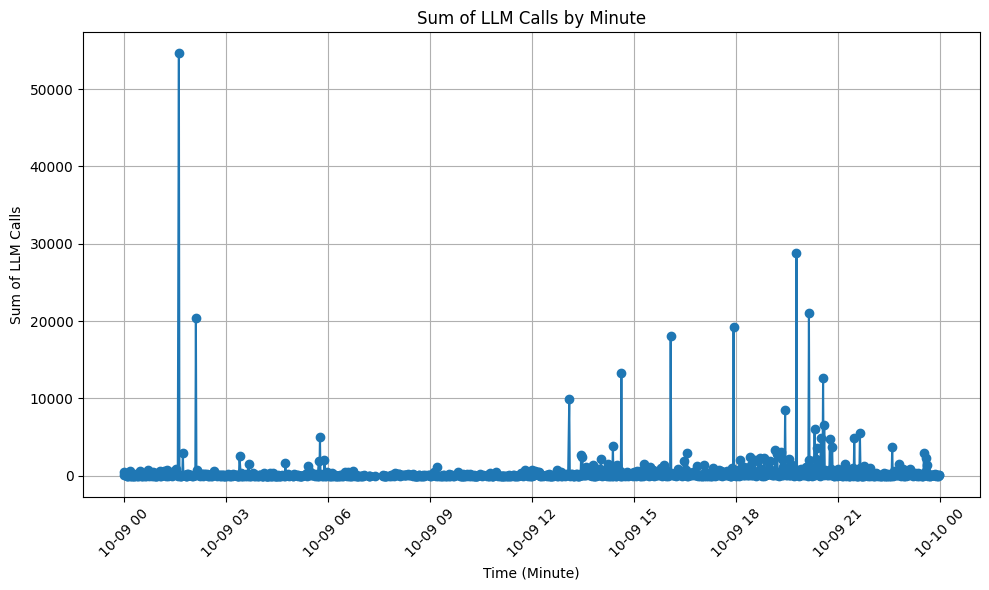

In [8]:
# Extract the minute from the timestamp (keeping the date)
df['minute'] = df['created_at'].dt.floor('T')  # This rounds down to the nearest minute

# Group by the minute and sum the `llm_calls` for each minute
df_grouped = df.groupby('minute')['llm_calls'].sum().reset_index()

# Plot the result
plt.figure(figsize=(10,6))
plt.plot(df_grouped['minute'], df_grouped['llm_calls'], marker='o', linestyle='-')
plt.title('Sum of LLM Calls by Minute')
plt.xlabel('Time (Minute)')
plt.ylabel('Sum of LLM Calls')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Calculate the 90th percentile LLM cost per flow type

In [9]:
# OpenAI Pricing Information for gpt-4o-2024-08-06: https://openai.com/api/pricing/
gpt_4_price_per_1m_tokens_input = 2.50  # USD per 1M input tokens
gpt_4_price_per_1m_tokens_output = 10.00  # USD per 1M output tokens

In [10]:
# Calculate the LLM cost based on pricing information 
df['llm_cost'] = (df['tokens_in'] / 1000000 * gpt_4_price_per_1m_tokens_input) + \
                 (df['tokens_out'] / 1000000 * gpt_4_price_per_1m_tokens_output)

In [11]:
df

,flow_id,created_at,finished_at,status,type,region,user_id,org_id,tokens_in,tokens_out,llm_calls,minute,llm_cost
0,e1cff0eb-479d-4c7e-8a3b-052ab59e999d,2024-10-09 12:11:55.863384+00:00,2024-10-09 12:13:10.746038+00:00,SUCCESS,sdb,uk,a0da1a4b12f8c8b2928c22aaaa550c687b770333199426...,ac2c76f4d160ef3b81bef4ca60edfa4843901c7e8ee5f3...,116882,814,103,2024-10-09 12:11:00+00:00,0.300345
1,118f64fc-9600-49fc-9df9-0093a787bc55,2024-10-09 13:47:23.312049+00:00,2024-10-09 13:48:38.656773+00:00,SUCCESS,sdb,uk,fea9c6503525aa334f3c24751a3a068e0b24a353e09d4e...,e12febdc748f6acd2921a886343e1f41d133de7c19fb9b...,185114,937,158,2024-10-09 13:47:00+00:00,0.472155
2,06a64b2e-e39d-4b62-a91a-4c9e58596214,2024-10-09 13:45:24.049921+00:00,2024-10-09 13:46:19.314224+00:00,SUCCESS,sdb,uk,fea9c6503525aa334f3c24751a3a068e0b24a353e09d4e...,e12febdc748f6acd2921a886343e1f41d133de7c19fb9b...,84081,703,74,2024-10-09 13:45:00+00:00,0.217233
3,6ed258d7-a895-48ac-a433-3ec2fc9bcb30,2024-10-09 13:41:45.138533+00:00,2024-10-09 13:42:54.665148+00:00,SUCCESS,sdb,uk,fea9c6503525aa334f3c24751a3a068e0b24a353e09d4e...,e12febdc748f6acd2921a886343e1f41d133de7c19fb9b...,188562,1010,164,2024-10-09 13:41:00+00:00,0.481505
4,e3520592-eaa4-4e96-bf3c-c04707501076,2024-10-09 13:44:16.430752+00:00,2024-10-09 13:44:34.772739+00:00,SUCCESS,sdb,uk,fea9c6503525aa334f3c24751a3a068e0b24a353e09d4e...,e12febdc748f6acd2921a886343e1f41d133de7c19fb9b...,169553,501,149,2024-10-09 13:44:00+00:00,0.428893
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659,b35bc55d-c21d-4e66-8276-b599c3fe5293,2024-10-09 05:47:36.791550+00:00,2024-10-09 05:48:47.466698+00:00,SUCCESS,draft_discovery_response,us,faa2bf6f125d936893dff2406d0c2b473685b2cc5bb6dd...,cde912738d575aac026e4fc4ed528bc9615a9cef652aa1...,174148,9160,104,2024-10-09 05:47:00+00:00,0.526970
4660,ffbf66aa-76e1-47ff-9e46-9efc78bced96,2024-10-09 19:58:35.964964+00:00,2024-10-09 19:59:06.056915+00:00,SUCCESS,draft_discovery_response,us,6009caa78d99d671544c42f56a25fb4bfd3f4b3991b531...,30459fee6fb41008bbef3842ff4591cddf237e6e22bbf8...,24589,1534,18,2024-10-09 19:58:00+00:00,0.076813
4661,11c176e6-e7d4-4dd8-86a0-1bf8ba3523e4,2024-10-09 21:51:42.595501+00:00,2024-10-09 21:52:09.454750+00:00,SUCCESS,draft_discovery_response,us,6009caa78d99d671544c42f56a25fb4bfd3f4b3991b531...,30459fee6fb41008bbef3842ff4591cddf237e6e22bbf8...,40812,1679,28,2024-10-09 21:51:00+00:00,0.118820
4662,1b8f208d-83a7-49c5-8b80-0b13239c022d,2024-10-09 21:44:12.822426+00:00,2024-10-09 21:44:38.865850+00:00,SUCCESS,draft_discovery_response,us,6009caa78d99d671544c42f56a25fb4bfd3f4b3991b531...,30459fee6fb41008bbef3842ff4591cddf237e6e22bbf8...,40812,1701,28,2024-10-09 21:44:00+00:00,0.119040


In [12]:
# Calculate 90th percentile of LLM cost for each flow type
llm_cost_90th_percentile = df.groupby('type')['llm_cost'].quantile(0.90).reset_index()

In [13]:
llm_cost_90th_percentile.columns = ['flow_type', '90th_percentile_llm_cost']

In [14]:
llm_cost_90th_percentile

,flow_type,90th_percentile_llm_cost
0,contract_answer,1.105110
1,contract_policy_analysis,1.372566
2,customize_redline_user,0.000000
3,deposition_questions,0.007601
4,deposition_topics,0.001437
5,draft_correspondence,0.009830
6,draft_discovery_request,0.107163
7,draft_discovery_response,0.432356
8,lc_compare_docs,0.232931
9,lc_correspondence,0.170185


### Peak Token throughput during the course of the day

#### cleaning

In [15]:
def round_to_nearest_second(dt):
    """Rounds a datetime object to the nearest second."""
    
    # Calculate the fractional seconds
    fractional_seconds = dt.microsecond / 1e6
    
    # If the fractional seconds are 0.5 or more, increment the second
    if fractional_seconds >= 0.5:
        dt += datetime.timedelta(seconds=1)
    
    return dt.replace(microsecond=0)

In [16]:
# testing function 
now = datetime.datetime.now()
print("Original:", now)
print("Rounded:", round_to_nearest_second(now))

Original: 2024-10-14 15:27:02.540427
Rounded: 2024-10-14 15:27:03


In [17]:
df['created_at_rounded'] = df['created_at'].apply(round_to_nearest_second)

In [18]:
df['finished_at_rounded'] = df['finished_at'].apply(round_to_nearest_second)

In [19]:
df

,flow_id,created_at,finished_at,status,type,region,user_id,org_id,tokens_in,tokens_out,llm_calls,minute,llm_cost,created_at_rounded,finished_at_rounded
0,e1cff0eb-479d-4c7e-8a3b-052ab59e999d,2024-10-09 12:11:55.863384+00:00,2024-10-09 12:13:10.746038+00:00,SUCCESS,sdb,uk,a0da1a4b12f8c8b2928c22aaaa550c687b770333199426...,ac2c76f4d160ef3b81bef4ca60edfa4843901c7e8ee5f3...,116882,814,103,2024-10-09 12:11:00+00:00,0.300345,2024-10-09 12:11:56+00:00,2024-10-09 12:13:11+00:00
1,118f64fc-9600-49fc-9df9-0093a787bc55,2024-10-09 13:47:23.312049+00:00,2024-10-09 13:48:38.656773+00:00,SUCCESS,sdb,uk,fea9c6503525aa334f3c24751a3a068e0b24a353e09d4e...,e12febdc748f6acd2921a886343e1f41d133de7c19fb9b...,185114,937,158,2024-10-09 13:47:00+00:00,0.472155,2024-10-09 13:47:23+00:00,2024-10-09 13:48:39+00:00
2,06a64b2e-e39d-4b62-a91a-4c9e58596214,2024-10-09 13:45:24.049921+00:00,2024-10-09 13:46:19.314224+00:00,SUCCESS,sdb,uk,fea9c6503525aa334f3c24751a3a068e0b24a353e09d4e...,e12febdc748f6acd2921a886343e1f41d133de7c19fb9b...,84081,703,74,2024-10-09 13:45:00+00:00,0.217233,2024-10-09 13:45:24+00:00,2024-10-09 13:46:19+00:00
3,6ed258d7-a895-48ac-a433-3ec2fc9bcb30,2024-10-09 13:41:45.138533+00:00,2024-10-09 13:42:54.665148+00:00,SUCCESS,sdb,uk,fea9c6503525aa334f3c24751a3a068e0b24a353e09d4e...,e12febdc748f6acd2921a886343e1f41d133de7c19fb9b...,188562,1010,164,2024-10-09 13:41:00+00:00,0.481505,2024-10-09 13:41:45+00:00,2024-10-09 13:42:55+00:00
4,e3520592-eaa4-4e96-bf3c-c04707501076,2024-10-09 13:44:16.430752+00:00,2024-10-09 13:44:34.772739+00:00,SUCCESS,sdb,uk,fea9c6503525aa334f3c24751a3a068e0b24a353e09d4e...,e12febdc748f6acd2921a886343e1f41d133de7c19fb9b...,169553,501,149,2024-10-09 13:44:00+00:00,0.428893,2024-10-09 13:44:16+00:00,2024-10-09 13:44:35+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659,b35bc55d-c21d-4e66-8276-b599c3fe5293,2024-10-09 05:47:36.791550+00:00,2024-10-09 05:48:47.466698+00:00,SUCCESS,draft_discovery_response,us,faa2bf6f125d936893dff2406d0c2b473685b2cc5bb6dd...,cde912738d575aac026e4fc4ed528bc9615a9cef652aa1...,174148,9160,104,2024-10-09 05:47:00+00:00,0.526970,2024-10-09 05:47:37+00:00,2024-10-09 05:48:47+00:00
4660,ffbf66aa-76e1-47ff-9e46-9efc78bced96,2024-10-09 19:58:35.964964+00:00,2024-10-09 19:59:06.056915+00:00,SUCCESS,draft_discovery_response,us,6009caa78d99d671544c42f56a25fb4bfd3f4b3991b531...,30459fee6fb41008bbef3842ff4591cddf237e6e22bbf8...,24589,1534,18,2024-10-09 19:58:00+00:00,0.076813,2024-10-09 19:58:36+00:00,2024-10-09 19:59:06+00:00
4661,11c176e6-e7d4-4dd8-86a0-1bf8ba3523e4,2024-10-09 21:51:42.595501+00:00,2024-10-09 21:52:09.454750+00:00,SUCCESS,draft_discovery_response,us,6009caa78d99d671544c42f56a25fb4bfd3f4b3991b531...,30459fee6fb41008bbef3842ff4591cddf237e6e22bbf8...,40812,1679,28,2024-10-09 21:51:00+00:00,0.118820,2024-10-09 21:51:43+00:00,2024-10-09 21:52:09+00:00
4662,1b8f208d-83a7-49c5-8b80-0b13239c022d,2024-10-09 21:44:12.822426+00:00,2024-10-09 21:44:38.865850+00:00,SUCCESS,draft_discovery_response,us,6009caa78d99d671544c42f56a25fb4bfd3f4b3991b531...,30459fee6fb41008bbef3842ff4591cddf237e6e22bbf8...,40812,1701,28,2024-10-09 21:44:00+00:00,0.119040,2024-10-09 21:44:13+00:00,2024-10-09 21:44:39+00:00


In [20]:
df['duration_seconds'] = (df['finished_at'] - df['created_at']).dt.total_seconds()

In [21]:
# Calculate token throughput per second
df['total_tokens'] = df['tokens_in'] + df['tokens_out']
df['tokens_per_second'] = df['total_tokens'] / df['duration_seconds']

In [22]:
df.head()

,flow_id,created_at,finished_at,status,type,region,user_id,org_id,tokens_in,tokens_out,llm_calls,minute,llm_cost,created_at_rounded,finished_at_rounded,duration_seconds,total_tokens,tokens_per_second
0,e1cff0eb-479d-4c7e-8a3b-052ab59e999d,2024-10-09 12:11:55.863384+00:00,2024-10-09 12:13:10.746038+00:00,SUCCESS,sdb,uk,a0da1a4b12f8c8b2928c22aaaa550c687b770333199426...,ac2c76f4d160ef3b81bef4ca60edfa4843901c7e8ee5f3...,116882,814,103,2024-10-09 12:11:00+00:00,0.300345,2024-10-09 12:11:56+00:00,2024-10-09 12:13:11+00:00,74.882654,117696,1571.739164
1,118f64fc-9600-49fc-9df9-0093a787bc55,2024-10-09 13:47:23.312049+00:00,2024-10-09 13:48:38.656773+00:00,SUCCESS,sdb,uk,fea9c6503525aa334f3c24751a3a068e0b24a353e09d4e...,e12febdc748f6acd2921a886343e1f41d133de7c19fb9b...,185114,937,158,2024-10-09 13:47:00+00:00,0.472155,2024-10-09 13:47:23+00:00,2024-10-09 13:48:39+00:00,75.344724,186051,2469.330168
2,06a64b2e-e39d-4b62-a91a-4c9e58596214,2024-10-09 13:45:24.049921+00:00,2024-10-09 13:46:19.314224+00:00,SUCCESS,sdb,uk,fea9c6503525aa334f3c24751a3a068e0b24a353e09d4e...,e12febdc748f6acd2921a886343e1f41d133de7c19fb9b...,84081,703,74,2024-10-09 13:45:00+00:00,0.217233,2024-10-09 13:45:24+00:00,2024-10-09 13:46:19+00:00,55.264303,84784,1534.154878
3,6ed258d7-a895-48ac-a433-3ec2fc9bcb30,2024-10-09 13:41:45.138533+00:00,2024-10-09 13:42:54.665148+00:00,SUCCESS,sdb,uk,fea9c6503525aa334f3c24751a3a068e0b24a353e09d4e...,e12febdc748f6acd2921a886343e1f41d133de7c19fb9b...,188562,1010,164,2024-10-09 13:41:00+00:00,0.481505,2024-10-09 13:41:45+00:00,2024-10-09 13:42:55+00:00,69.526615,189572,2726.610522
4,e3520592-eaa4-4e96-bf3c-c04707501076,2024-10-09 13:44:16.430752+00:00,2024-10-09 13:44:34.772739+00:00,SUCCESS,sdb,uk,fea9c6503525aa334f3c24751a3a068e0b24a353e09d4e...,e12febdc748f6acd2921a886343e1f41d133de7c19fb9b...,169553,501,149,2024-10-09 13:44:00+00:00,0.428893,2024-10-09 13:44:16+00:00,2024-10-09 13:44:35+00:00,18.341987,170054,9271.296507


In [23]:
# its only 15/ 4K rows with NaT --> so for now I'm going to drop them, may change this fix later 
df[df.isnull().any(axis=1)]

,flow_id,created_at,finished_at,status,type,region,user_id,org_id,tokens_in,tokens_out,llm_calls,minute,llm_cost,created_at_rounded,finished_at_rounded,duration_seconds,total_tokens,tokens_per_second
801,008b5b68-681b-4a14-a72c-4b2653db7ca8,2024-10-09 16:26:56.315686+00:00,NaT,PROCESSING,lc_timeline,us,b25e0d539c778b5fbd8a52d2e5135c3da742a1351b280a...,bbd09d13b43e77153faf7cd67e8fa8dc1f5020dae09040...,252,479,6,2024-10-09 16:26:00+00:00,0.005420,2024-10-09 16:26:56+00:00,NaT,NaN,731,NaN
817,8befd580-221a-4efe-b1b0-822e5199b3e3,2024-10-09 18:27:11.593358+00:00,NaT,PROCESSING,lc_timeline,us,859e94953a3aabefe6b0a8fad4d43ddaea05f94299cc88...,518f5358dc1ee627f2cac02cdfeb14621a16488b3a75d1...,390,480,6,2024-10-09 18:27:00+00:00,0.005775,2024-10-09 18:27:12+00:00,NaT,NaN,870,NaN
864,8e6073dc-3343-4125-b1a7-5d6d6559155b,2024-10-09 12:06:58.120767+00:00,NaT,PROCESSING,lc_timeline,us,17168dc2d3ce6ad6ff899b39ad94cf3b6ac27a64db92cd...,1581cf7e1a4526d800ee683d12e1623284d4b8e008a3be...,402,592,6,2024-10-09 12:06:00+00:00,0.006925,2024-10-09 12:06:58+00:00,NaT,NaN,994,NaN
866,0d251ba2-4228-441c-89b0-98293a3697ec,2024-10-09 13:20:14.094142+00:00,NaT,PROCESSING,lc_timeline,us,17168dc2d3ce6ad6ff899b39ad94cf3b6ac27a64db92cd...,1581cf7e1a4526d800ee683d12e1623284d4b8e008a3be...,402,600,6,2024-10-09 13:20:00+00:00,0.007005,2024-10-09 13:20:14+00:00,NaT,NaN,1002,NaN
2658,6079c148-a368-4341-b8bf-8fffa1315a0a,2024-10-09 19:47:16.740353+00:00,NaT,PROCESSING,timeline,us,d5e6916489e72af4f66cadd0949ee018bfa25f9934e42f...,7fad04eecc47b4955eed22d3d84a5f7a81598552dd45be...,46985854,1234101,27232,2024-10-09 19:47:00+00:00,129.805645,2024-10-09 19:47:17+00:00,NaT,NaN,48219955,NaN
3006,c52055f8-ad3f-4de3-8c8f-294b9f7ce2aa,2024-10-09 18:12:26.320596+00:00,NaT,PROCESSING,lc_timeline,us,859e94953a3aabefe6b0a8fad4d43ddaea05f94299cc88...,518f5358dc1ee627f2cac02cdfeb14621a16488b3a75d1...,390,479,6,2024-10-09 18:12:00+00:00,0.005765,2024-10-09 18:12:26+00:00,NaT,NaN,869,NaN
3007,7e871fb7-09e2-4384-b03b-8dbce8150bc2,2024-10-09 23:08:31.574176+00:00,NaT,PROCESSING,lc_timeline,us,b58b3b0377a53b10dfef80d2d1ae9bf4a46bcfffac72c4...,19b8bae28022c7777eb56c7d4a5bf19efd84e185afd8c6...,300,450,6,2024-10-09 23:08:00+00:00,0.005250,2024-10-09 23:08:32+00:00,NaT,NaN,750,NaN
3008,fe323a74-8436-41d0-8781-b955f7693093,2024-10-09 12:35:00.951911+00:00,NaT,PROCESSING,lc_timeline,us,b58b3b0377a53b10dfef80d2d1ae9bf4a46bcfffac72c4...,19b8bae28022c7777eb56c7d4a5bf19efd84e185afd8c6...,306,528,6,2024-10-09 12:35:00+00:00,0.006045,2024-10-09 12:35:01+00:00,NaT,NaN,834,NaN
3009,87bcec7f-b643-41de-8595-484d9f162de7,2024-10-09 23:13:22.232287+00:00,NaT,PROCESSING,lc_timeline,us,b58b3b0377a53b10dfef80d2d1ae9bf4a46bcfffac72c4...,19b8bae28022c7777eb56c7d4a5bf19efd84e185afd8c6...,300,450,6,2024-10-09 23:13:00+00:00,0.005250,2024-10-09 23:13:22+00:00,NaT,NaN,750,NaN
3028,794f5418-e4ca-4fd1-a3a8-40ebefa376aa,2024-10-09 17:55:51.334405+00:00,NaT,PROCESSING,lc_timeline,us,2b70efa1a064c6b777f6c0fb2fc3c2bd680b14e95e7d87...,eed1fa06cb7c4c6f89f0911368720b581ceb9067048077...,264,432,6,2024-10-09 17:55:00+00:00,0.004980,2024-10-09 17:55:51+00:00,NaT,NaN,696,NaN


In [24]:
not_NaT_df = df[~df.isnull().any(axis=1)]

In [25]:
not_NaT_df.shape

(4649, 18)

In [26]:
not_NaT_df.head()

,flow_id,created_at,finished_at,status,type,region,user_id,org_id,tokens_in,tokens_out,llm_calls,minute,llm_cost,created_at_rounded,finished_at_rounded,duration_seconds,total_tokens,tokens_per_second
0,e1cff0eb-479d-4c7e-8a3b-052ab59e999d,2024-10-09 12:11:55.863384+00:00,2024-10-09 12:13:10.746038+00:00,SUCCESS,sdb,uk,a0da1a4b12f8c8b2928c22aaaa550c687b770333199426...,ac2c76f4d160ef3b81bef4ca60edfa4843901c7e8ee5f3...,116882,814,103,2024-10-09 12:11:00+00:00,0.300345,2024-10-09 12:11:56+00:00,2024-10-09 12:13:11+00:00,74.882654,117696,1571.739164
1,118f64fc-9600-49fc-9df9-0093a787bc55,2024-10-09 13:47:23.312049+00:00,2024-10-09 13:48:38.656773+00:00,SUCCESS,sdb,uk,fea9c6503525aa334f3c24751a3a068e0b24a353e09d4e...,e12febdc748f6acd2921a886343e1f41d133de7c19fb9b...,185114,937,158,2024-10-09 13:47:00+00:00,0.472155,2024-10-09 13:47:23+00:00,2024-10-09 13:48:39+00:00,75.344724,186051,2469.330168
2,06a64b2e-e39d-4b62-a91a-4c9e58596214,2024-10-09 13:45:24.049921+00:00,2024-10-09 13:46:19.314224+00:00,SUCCESS,sdb,uk,fea9c6503525aa334f3c24751a3a068e0b24a353e09d4e...,e12febdc748f6acd2921a886343e1f41d133de7c19fb9b...,84081,703,74,2024-10-09 13:45:00+00:00,0.217233,2024-10-09 13:45:24+00:00,2024-10-09 13:46:19+00:00,55.264303,84784,1534.154878
3,6ed258d7-a895-48ac-a433-3ec2fc9bcb30,2024-10-09 13:41:45.138533+00:00,2024-10-09 13:42:54.665148+00:00,SUCCESS,sdb,uk,fea9c6503525aa334f3c24751a3a068e0b24a353e09d4e...,e12febdc748f6acd2921a886343e1f41d133de7c19fb9b...,188562,1010,164,2024-10-09 13:41:00+00:00,0.481505,2024-10-09 13:41:45+00:00,2024-10-09 13:42:55+00:00,69.526615,189572,2726.610522
4,e3520592-eaa4-4e96-bf3c-c04707501076,2024-10-09 13:44:16.430752+00:00,2024-10-09 13:44:34.772739+00:00,SUCCESS,sdb,uk,fea9c6503525aa334f3c24751a3a068e0b24a353e09d4e...,e12febdc748f6acd2921a886343e1f41d133de7c19fb9b...,169553,501,149,2024-10-09 13:44:00+00:00,0.428893,2024-10-09 13:44:16+00:00,2024-10-09 13:44:35+00:00,18.341987,170054,9271.296507


#### solution cleaned and optimized

In [27]:
not_NaT_df.iloc[0]

flow_id                             e1cff0eb-479d-4c7e-8a3b-052ab59e999d
created_at                              2024-10-09 12:11:55.863384+00:00
finished_at                             2024-10-09 12:13:10.746038+00:00
status                                                           SUCCESS
type                                                                 sdb
region                                                                uk
user_id                a0da1a4b12f8c8b2928c22aaaa550c687b770333199426...
org_id                 ac2c76f4d160ef3b81bef4ca60edfa4843901c7e8ee5f3...
tokens_in                                                         116882
tokens_out                                                           814
llm_calls                                                            103
minute                                         2024-10-09 12:11:00+00:00
llm_cost                                                        0.300345
created_at_rounded                             2024

In [28]:
data_dict = not_NaT_df.to_dict(orient='records')

In [29]:
data_dict

[{'flow_id': 'e1cff0eb-479d-4c7e-8a3b-052ab59e999d',
  'created_at': Timestamp('2024-10-09 12:11:55.863384+0000', tz='UTC'),
  'finished_at': Timestamp('2024-10-09 12:13:10.746038+0000', tz='UTC'),
  'status': 'SUCCESS',
  'type': 'sdb',
  'region': 'uk',
  'user_id': 'a0da1a4b12f8c8b2928c22aaaa550c687b770333199426a62a7821f071aea1ad',
  'org_id': 'ac2c76f4d160ef3b81bef4ca60edfa4843901c7e8ee5f3699b419b125133308f',
  'tokens_in': 116882,
  'tokens_out': 814,
  'llm_calls': 103,
  'minute': Timestamp('2024-10-09 12:11:00+0000', tz='UTC'),
  'llm_cost': 0.300345,
  'created_at_rounded': Timestamp('2024-10-09 12:11:56+0000', tz='UTC'),
  'finished_at_rounded': Timestamp('2024-10-09 12:13:11+0000', tz='UTC'),
  'duration_seconds': 74.882654,
  'total_tokens': 117696,
  'tokens_per_second': 1571.7391640525989},
 {'flow_id': '118f64fc-9600-49fc-9df9-0093a787bc55',
  'created_at': Timestamp('2024-10-09 13:47:23.312049+0000', tz='UTC'),
  'finished_at': Timestamp('2024-10-09 13:48:38.656773+0000

In [30]:
# dont include the ending minute 
pd.date_range(start=data_dict[1]['created_at_rounded'], end=data_dict[1]['finished_at_rounded'], freq='S')[:-1]

DatetimeIndex(['2024-10-09 13:47:23+00:00', '2024-10-09 13:47:24+00:00',
               '2024-10-09 13:47:25+00:00', '2024-10-09 13:47:26+00:00',
               '2024-10-09 13:47:27+00:00', '2024-10-09 13:47:28+00:00',
               '2024-10-09 13:47:29+00:00', '2024-10-09 13:47:30+00:00',
               '2024-10-09 13:47:31+00:00', '2024-10-09 13:47:32+00:00',
               '2024-10-09 13:47:33+00:00', '2024-10-09 13:47:34+00:00',
               '2024-10-09 13:47:35+00:00', '2024-10-09 13:47:36+00:00',
               '2024-10-09 13:47:37+00:00', '2024-10-09 13:47:38+00:00',
               '2024-10-09 13:47:39+00:00', '2024-10-09 13:47:40+00:00',
               '2024-10-09 13:47:41+00:00', '2024-10-09 13:47:42+00:00',
               '2024-10-09 13:47:43+00:00', '2024-10-09 13:47:44+00:00',
               '2024-10-09 13:47:45+00:00', '2024-10-09 13:47:46+00:00',
               '2024-10-09 13:47:47+00:00', '2024-10-09 13:47:48+00:00',
               '2024-10-09 13:47:49+00:00', '2024-1

In [31]:
data_dict

[{'flow_id': 'e1cff0eb-479d-4c7e-8a3b-052ab59e999d',
  'created_at': Timestamp('2024-10-09 12:11:55.863384+0000', tz='UTC'),
  'finished_at': Timestamp('2024-10-09 12:13:10.746038+0000', tz='UTC'),
  'status': 'SUCCESS',
  'type': 'sdb',
  'region': 'uk',
  'user_id': 'a0da1a4b12f8c8b2928c22aaaa550c687b770333199426a62a7821f071aea1ad',
  'org_id': 'ac2c76f4d160ef3b81bef4ca60edfa4843901c7e8ee5f3699b419b125133308f',
  'tokens_in': 116882,
  'tokens_out': 814,
  'llm_calls': 103,
  'minute': Timestamp('2024-10-09 12:11:00+0000', tz='UTC'),
  'llm_cost': 0.300345,
  'created_at_rounded': Timestamp('2024-10-09 12:11:56+0000', tz='UTC'),
  'finished_at_rounded': Timestamp('2024-10-09 12:13:11+0000', tz='UTC'),
  'duration_seconds': 74.882654,
  'total_tokens': 117696,
  'tokens_per_second': 1571.7391640525989},
 {'flow_id': '118f64fc-9600-49fc-9df9-0093a787bc55',
  'created_at': Timestamp('2024-10-09 13:47:23.312049+0000', tz='UTC'),
  'finished_at': Timestamp('2024-10-09 13:48:38.656773+0000

In [32]:
time_range = pd.date_range(start=data_dict[1]['created_at_rounded'], end=data_dict[1]['finished_at_rounded'], freq='S')[:-1]
np.full(len(time_range), data_dict[1]['tokens_per_second'])

array([2469.33016836, 2469.33016836, 2469.33016836, 2469.33016836,
       2469.33016836, 2469.33016836, 2469.33016836, 2469.33016836,
       2469.33016836, 2469.33016836, 2469.33016836, 2469.33016836,
       2469.33016836, 2469.33016836, 2469.33016836, 2469.33016836,
       2469.33016836, 2469.33016836, 2469.33016836, 2469.33016836,
       2469.33016836, 2469.33016836, 2469.33016836, 2469.33016836,
       2469.33016836, 2469.33016836, 2469.33016836, 2469.33016836,
       2469.33016836, 2469.33016836, 2469.33016836, 2469.33016836,
       2469.33016836, 2469.33016836, 2469.33016836, 2469.33016836,
       2469.33016836, 2469.33016836, 2469.33016836, 2469.33016836,
       2469.33016836, 2469.33016836, 2469.33016836, 2469.33016836,
       2469.33016836, 2469.33016836, 2469.33016836, 2469.33016836,
       2469.33016836, 2469.33016836, 2469.33016836, 2469.33016836,
       2469.33016836, 2469.33016836, 2469.33016836, 2469.33016836,
       2469.33016836, 2469.33016836, 2469.33016836, 2469.33016

In [33]:
seconds = []

In [34]:
seconds.extend(time_range)
seconds

[Timestamp('2024-10-09 13:47:23+0000', tz='UTC'),
 Timestamp('2024-10-09 13:47:24+0000', tz='UTC'),
 Timestamp('2024-10-09 13:47:25+0000', tz='UTC'),
 Timestamp('2024-10-09 13:47:26+0000', tz='UTC'),
 Timestamp('2024-10-09 13:47:27+0000', tz='UTC'),
 Timestamp('2024-10-09 13:47:28+0000', tz='UTC'),
 Timestamp('2024-10-09 13:47:29+0000', tz='UTC'),
 Timestamp('2024-10-09 13:47:30+0000', tz='UTC'),
 Timestamp('2024-10-09 13:47:31+0000', tz='UTC'),
 Timestamp('2024-10-09 13:47:32+0000', tz='UTC'),
 Timestamp('2024-10-09 13:47:33+0000', tz='UTC'),
 Timestamp('2024-10-09 13:47:34+0000', tz='UTC'),
 Timestamp('2024-10-09 13:47:35+0000', tz='UTC'),
 Timestamp('2024-10-09 13:47:36+0000', tz='UTC'),
 Timestamp('2024-10-09 13:47:37+0000', tz='UTC'),
 Timestamp('2024-10-09 13:47:38+0000', tz='UTC'),
 Timestamp('2024-10-09 13:47:39+0000', tz='UTC'),
 Timestamp('2024-10-09 13:47:40+0000', tz='UTC'),
 Timestamp('2024-10-09 13:47:41+0000', tz='UTC'),
 Timestamp('2024-10-09 13:47:42+0000', tz='UTC'),


In [35]:
tokens = []

In [36]:
tokens.extend([data_dict[1]['tokens_per_second']] * len(time_range))
len(tokens)

76

In [37]:
seconds_df = pd.DataFrame(seconds)

In [38]:
seconds_df

,0
0,2024-10-09 13:47:23+00:00
1,2024-10-09 13:47:24+00:00
2,2024-10-09 13:47:25+00:00
3,2024-10-09 13:47:26+00:00
4,2024-10-09 13:47:27+00:00
...,...
71,2024-10-09 13:48:34+00:00
72,2024-10-09 13:48:35+00:00
73,2024-10-09 13:48:36+00:00
74,2024-10-09 13:48:37+00:00


In [39]:
seconds_df[0].dt.floor('T') 

0    2024-10-09 13:47:00+00:00
1    2024-10-09 13:47:00+00:00
2    2024-10-09 13:47:00+00:00
3    2024-10-09 13:47:00+00:00
4    2024-10-09 13:47:00+00:00
                ...           
71   2024-10-09 13:48:00+00:00
72   2024-10-09 13:48:00+00:00
73   2024-10-09 13:48:00+00:00
74   2024-10-09 13:48:00+00:00
75   2024-10-09 13:48:00+00:00
Name: 0, Length: 76, dtype: datetime64[ns, UTC]

for each minute sum, the tokens_per_second for however many seconds that flow is on

##### base sln

### Seconds logic 

In [40]:
def generate_token_distribution(df):
    # Create a copy of the DataFrame to avoid SettingWithCopyWarning
    df = df.copy()

    # Get duration of flow in seconds
    df['duration_seconds'] = (df['finished_at_rounded'] - df['created_at_rounded']).dt.total_seconds()

    # Calculate total tokens and tokens per second
    df['total_tokens'] = df['tokens_in'] + df['tokens_out']
    df['tokens_per_second'] = df['total_tokens'] / df['duration_seconds'].replace(0, 1)  # Avoid division by zero

    seconds = []
    tokens = []

    # Iterate over each record
    for _, record in df.iterrows():
        # Create a second-level range from created_at to finished_at
        second_range = pd.date_range(start=record['created_at_rounded'], 
                                      end=record['finished_at_rounded'], 
                                      freq='S')  # 'S' for seconds
        
        # Calculate the number of seconds in this range
        num_seconds = len(second_range)

        # Extend the seconds and tokens lists
        seconds.extend(second_range)
        tokens.extend([record['tokens_per_second']] * num_seconds)

    # Create a DataFrame for the second-level data
    second_records = pd.DataFrame({'second': seconds, 'tokens': tokens})

    # Group by minute and sum tokens
    second_records['minute'] = second_records['second'].dt.floor('T')  # Get the minute part
    minute_records = second_records.groupby('minute')['tokens'].sum().reset_index()

    # Find the minute with the maximum tokens
    max_tokens_minute = minute_records.loc[minute_records['tokens'].idxmax()]

    return minute_records, max_tokens_minute


In [41]:
minute_records, max_tokens_minute = generate_token_distribution(not_NaT_df)

In [42]:
# Example usage (assuming df is defined):
# df['finished_at_rounded'] and df['created_at_rounded'] should be datetime columns.
# minute_records, max_tokens_minute = generate_token_distribution(df)
print("Minute with Most Tokens:\n", max_tokens_minute)


Minute with Most Tokens:
 minute    2024-10-09 20:39:00+00:00
tokens               7046305.220496
Name: 1184, dtype: object


#### make it more efficient

In [43]:
import pandas as pd

def generate_token_distribution(df):
    # Create a copy of the DataFrame to avoid SettingWithCopyWarning
    df = df.copy()

    # Get duration of flow in seconds
    df['duration_seconds'] = (df['finished_at_rounded'] - df['created_at_rounded']).dt.total_seconds()

    # Calculate total tokens and tokens per second
    df['total_tokens'] = df['tokens_in'] + df['tokens_out']
    df['tokens_per_second'] = df['total_tokens'] / df['duration_seconds'].replace(0, 1)  # Avoid division by zero

    # Convert DataFrame to a list of dictionaries
    data_dict = df.to_dict(orient='records')

    minutes = []
    tokens = []

    # Iterate over each record in the data_dict
    for record in data_dict:
        # Create a second-level range from created_at to finished_at
        second_range = pd.date_range(start=record['created_at_rounded'], 
                                      end=record['finished_at_rounded'], 
                                      freq='S')  # 'S' for seconds
        
        # Calculate the number of seconds in this range
        num_seconds = len(second_range)

        # Extend the minutes and tokens lists
        minutes.extend(second_range)
        tokens.extend([record['tokens_per_second']] * num_seconds)

    # Create a DataFrame for the second-level data
    second_records = pd.DataFrame({'second': minutes, 'tokens': tokens})

    # Group by minute and sum tokens
    second_records['minute'] = second_records['second'].dt.floor('T')  # Get the minute part
    minute_records = second_records.groupby('minute')['tokens'].sum().reset_index()

    # Find the minute with the maximum tokens
    max_tokens_minute = minute_records.loc[minute_records['tokens'].idxmax()]

    return minute_records, max_tokens_minute


In [44]:
minute_records, max_tokens_minute = generate_token_distribution(not_NaT_df)

In [45]:
print("Minute with Most Tokens:\n", max_tokens_minute)

Minute with Most Tokens:
 minute    2024-10-09 20:39:00+00:00
tokens               7046305.220496
Name: 1184, dtype: object
